<a href="https://colab.research.google.com/github/navya1708-sri/226Y1A66H4/blob/main/TASK_ENERGEY_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample dataset created: energy_readings.csv


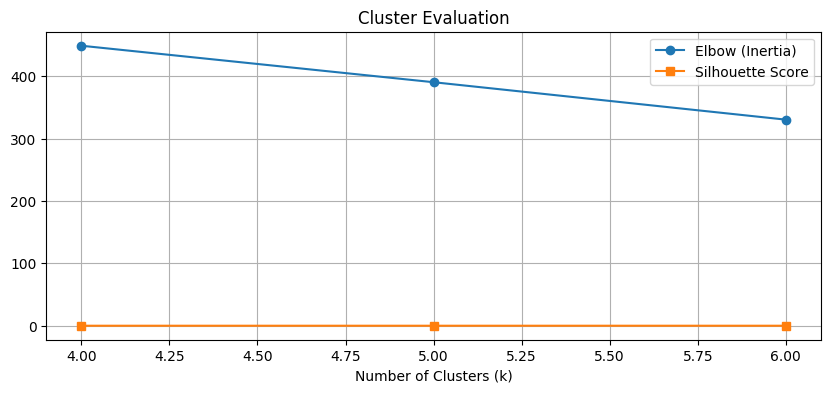

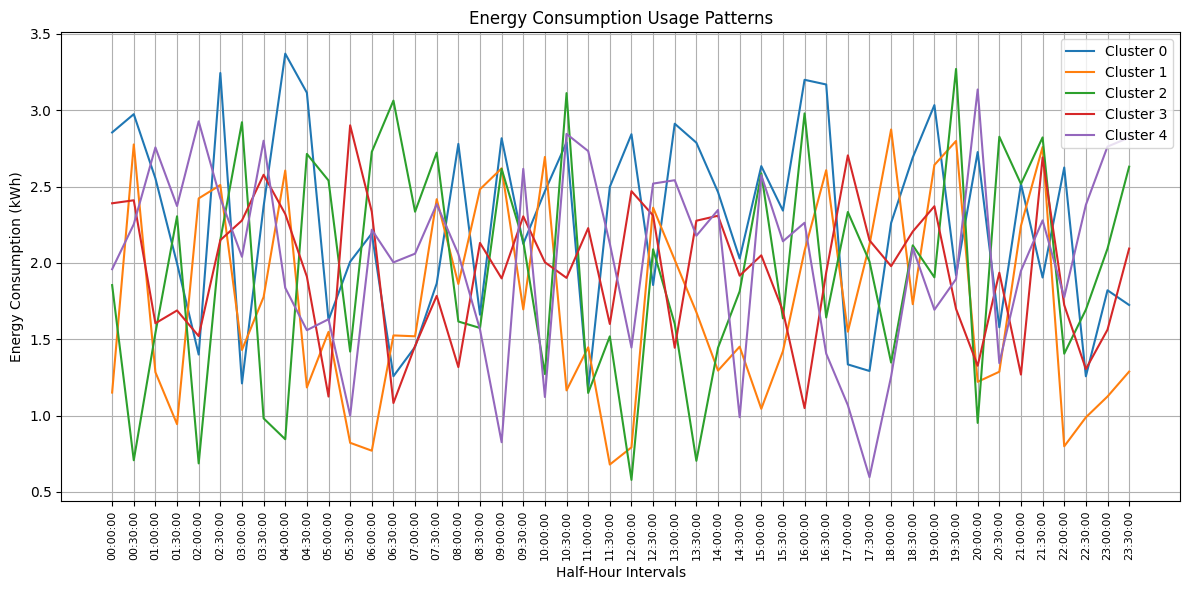

Output files generated: clustered_daily_energy_profiles.csv & cluster_centroids.png


In [2]:

# Energy Consumption Pattern Clustering


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

date_range = pd.date_range(
    start="2025-01-01",
    end="2025-01-15",
    freq="30min"
)

np.random.seed(42)
energy = np.random.uniform(0.5, 3.5, len(date_range))

df = pd.DataFrame({
    "timestamp": date_range,
    "energy": energy
})

df.to_csv("energy_readings.csv", index=False)
print("Sample dataset created: energy_readings.csv")

df = pd.read_csv("energy_readings.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

daily_profiles = df.pivot_table(
    index='date',
    columns='time',
    values='energy',
    aggfunc='mean'
).dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_profiles)

inertia = []
sil_scores = []
K_range = range(4, 7)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_data)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(scaled_data, km.labels_))

plt.figure(figsize=(10,4))
plt.plot(K_range, inertia, marker='o', label="Elbow (Inertia)")
plt.plot(K_range, sil_scores, marker='s', label="Silhouette Score")
plt.title("Cluster Evaluation")
plt.xlabel("Number of Clusters (k)")
plt.legend()
plt.grid(True)
plt.show()

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

daily_profiles['cluster'] = clusters

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 6))
time_labels = daily_profiles.columns[:-1]

for i in range(k):
    plt.plot(centroids[i], label=f"Cluster {i}")

plt.title("Energy Consumption Usage Patterns")
plt.xlabel("Half-Hour Intervals")
plt.ylabel("Energy Consumption (kWh)")
plt.xticks(range(len(time_labels)), time_labels, rotation=90, fontsize=8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cluster_centroids.png")
plt.show()

daily_profiles.to_csv("clustered_daily_energy_profiles.csv")
print("Output files generated: clustered_daily_energy_profiles.csv & cluster_centroids.png")